# Opdracht 5 - World Bank Data

In [31]:
import panel as pn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pn.extension('ipywidgets')

In [32]:
filename = '../datasets/World Bank DataBank World Development Indicators/indicators.csv'

In [33]:
df = pd.read_csv(filename, na_values='..', encoding='cp1252')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1524 entries, 0 to 1523
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   1521 non-null   object 
 1   Country Code   1519 non-null   object 
 2   Series Name    1519 non-null   object 
 3   Series Code    1519 non-null   object 
 4   1974 [YR1974]  751 non-null    float64
 5   1975 [YR1975]  754 non-null    float64
 6   1976 [YR1976]  756 non-null    float64
 7   1977 [YR1977]  758 non-null    float64
 8   1978 [YR1978]  759 non-null    float64
 9   1979 [YR1979]  759 non-null    float64
 10  1980 [YR1980]  772 non-null    float64
 11  1981 [YR1981]  775 non-null    float64
 12  1982 [YR1982]  778 non-null    float64
 13  1983 [YR1983]  779 non-null    float64
 14  1984 [YR1984]  781 non-null    float64
 15  1985 [YR1985]  783 non-null    float64
 16  1986 [YR1986]  786 non-null    float64
 17  1987 [YR1987]  791 non-null    float64
 18  1988 [YR

In [34]:
df[df['Country Code']=='NLD']

,Country Name,Country Code,Series Name,Series Code,1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
973,Netherlands,NLD,GDP (current US$),NY.GDP.MKTP.CD,8.724341e+10,1.002495e+11,1.091687e+11,1.270170e+11,1.558597e+11,1.796694e+11,...,8.921680e+11,7.655728e+11,7.840604e+11,8.338696e+11,9.140434e+11,9.101943e+11,9.097935e+11,1.029678e+12,1.009399e+12,NaN
974,Netherlands,NLD,"Population, total",SP.POP.TOTL,1.354506e+07,1.366634e+07,1.377404e+07,1.385618e+07,1.394170e+07,1.403827e+07,...,1.686501e+07,1.693992e+07,1.703031e+07,1.713130e+07,1.723162e+07,1.734487e+07,1.744150e+07,1.753304e+07,1.770098e+07,NaN
975,Netherlands,NLD,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,7.453683e+01,7.449878e+01,7.464707e+01,7.522146e+01,7.514512e+01,7.560610e+01,...,8.170732e+01,8.150976e+01,8.156098e+01,8.176098e+01,8.181220e+01,8.211220e+01,8.135854e+01,8.130976e+01,8.171463e+01,NaN
976,Netherlands,NLD,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.602000e+03,4.677000e+03,4.644000e+03,4.935000e+03,5.331000e+03,5.341000e+03,5.858000e+03,6.539000e+03,NaN,NaN
977,Netherlands,NLD,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.057000e+01,1.032000e+01,1.006000e+01,1.011000e+01,1.002000e+01,1.014000e+01,1.121000e+01,1.129000e+01,NaN,NaN
978,Netherlands,NLD,"GDP per capita, PPP (constant 2021 internation...",NY.GDP.PCAP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.161559e+04,6.254491e+04,6.357648e+04,6.504146e+04,6.618940e+04,6.704317e+04,6.408083e+04,6.769333e+04,6.995367e+04,NaN
979,Netherlands,NLD,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1.770000e+00,1.660000e+00,1.630000e+00,1.580000e+00,1.580000e+00,1.560000e+00,...,1.710000e+00,1.660000e+00,1.660000e+00,1.620000e+00,1.590000e+00,1.570000e+00,1.540000e+00,1.620000e+00,1.487000e+00,NaN


In [35]:
df_selected = df[df['Series Code'].isin(['SP.POP.TOTL', 'SP.DYN.LE00.IN', 'NY.GDP.PCAP.PP.KD'])].copy()

In [36]:
df_selected[['Country Name', 'Country Code']].value_counts()

Country Name   Country Code
Afghanistan    AFG             3
Pakistan       PAK             3
Nepal          NPL             3
Netherlands    NLD             3
New Caledonia  NCL             3
                              ..
Greece         GRC             3
Greenland      GRL             3
Grenada        GRD             3
Guam           GUM             3
Zimbabwe       ZWE             3
Length: 217, dtype: int64

In [37]:
df_selected[['Series Name', 'Series Code']].value_counts()

Series Name                                          Series Code      
GDP per capita, PPP (constant 2021 international $)  NY.GDP.PCAP.PP.KD    217
Life expectancy at birth, total (years)              SP.DYN.LE00.IN       217
Population, total                                    SP.POP.TOTL          217
dtype: int64

In [38]:
df_melted = df_selected.melt(id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'], 
                             value_vars=list(df_selected.columns)[4:], 
                             var_name='Year')

df_melted

,Country Name,Country Code,Series Name,Series Code,Year,value
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1974 [YR1974],1.186988e+07
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1974 [YR1974],3.955000e+01
2,Afghanistan,AFG,"GDP per capita, PPP (constant 2021 internation...",NY.GDP.PCAP.PP.KD,1974 [YR1974],NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1974 [YR1974],2.350124e+06
4,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1974 [YR1974],6.776900e+01
...,...,...,...,...,...,...
32545,Zambia,ZMB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2023 [YR2023],NaN
32546,Zambia,ZMB,"GDP per capita, PPP (constant 2021 internation...",NY.GDP.PCAP.PP.KD,2023 [YR2023],NaN
32547,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2023 [YR2023],NaN
32548,Zimbabwe,ZWE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2023 [YR2023],NaN


In [39]:
df_pivot = df_melted.pivot(index=['Country Name', 'Country Code', 'Year'], 
                           columns=['Series Name'], 
                           values='value').reset_index()

df_pivot

Series Name,Country Name,Country Code,Year,"GDP per capita, PPP (constant 2021 international $)","Life expectancy at birth, total (years)","Population, total"
0,Afghanistan,AFG,1974 [YR1974],NaN,39.550,11869879.0
1,Afghanistan,AFG,1975 [YR1975],NaN,40.100,12157386.0
2,Afghanistan,AFG,1976 [YR1976],NaN,40.645,12425267.0
3,Afghanistan,AFG,1977 [YR1977],NaN,41.228,12687301.0
4,Afghanistan,AFG,1978 [YR1978],NaN,40.271,12938862.0
...,...,...,...,...,...,...
10845,Zimbabwe,ZWE,2019 [YR2019],3412.966690,61.292,15354608.0
10846,Zimbabwe,ZWE,2020 [YR2020],3082.918997,61.124,15669666.0
10847,Zimbabwe,ZWE,2021 [YR2021],3276.267753,59.253,15993524.0
10848,Zimbabwe,ZWE,2022 [YR2022],3420.030280,59.391,16320537.0


In [40]:
df_year = df_pivot[df_pivot['Year'].str.startswith('2022')]

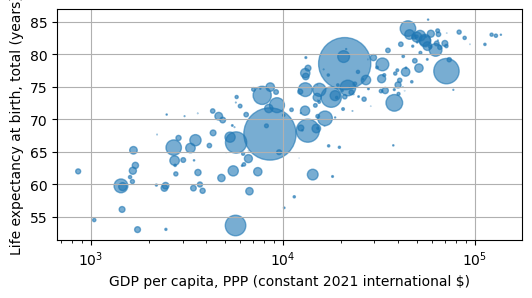

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))

ax.set_xscale('log')

sizes = df_year['Population, total'].values / 1000000

ax.scatter(x=df_year['GDP per capita, PPP (constant 2021 international $)'], 
           y=df_year['Life expectancy at birth, total (years)'],
           s=sizes,
           alpha=0.6)

ax.set(xlabel='GDP per capita, PPP (constant 2021 international $)',
       ylabel='Life expectancy at birth, total (years)')

ax.grid()

plt.show()

Column
    [0] Column
        [0] IntSlider(end=2022, name='year', start=1990, value=2022)
    [1] Row
        [0] Matplotlib(Figure, height=288, name='interactive00243', width=864)
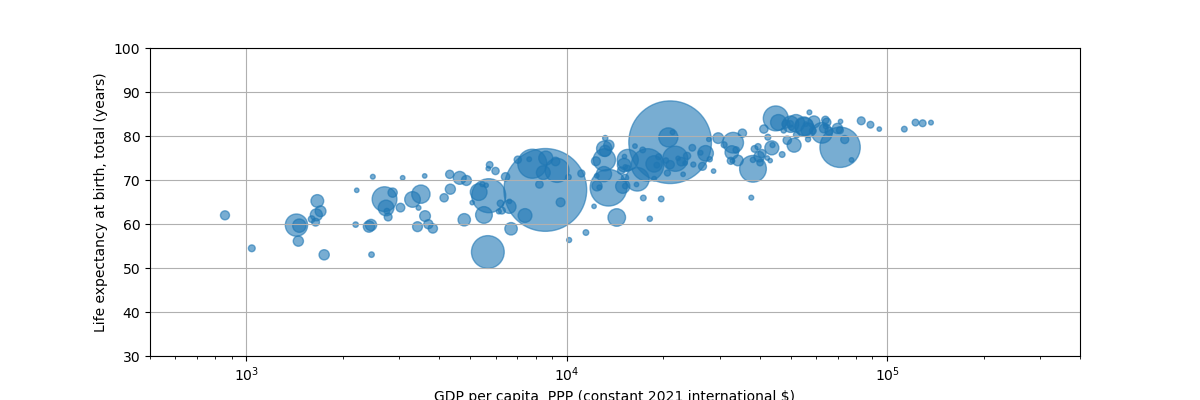

In [42]:
def create_plot(year=2022, 
                x_var='GDP per capita, PPP (constant 2021 international $)', 
                y_var='Life expectancy at birth, total (years)'):
    
    df_year = df_pivot[df_pivot['Year'].str.startswith(str(year))]
    
    fig, ax = plt.subplots(figsize=(12, 4))

    ax.set_xscale('log')
    
    ax.set_ylim(30, 100)
    ax.set_xlim(0.5e3, 4e5)

    sizes = df_year['Population, total'].values / 400000 + 10

    ax.scatter(x=df_year[x_var], 
               y=df_year[y_var],
               s=sizes,
               alpha=0.6)

    ax.set(xlabel=x_var,
           ylabel=y_var)

    ax.grid()

    plt.close()

    return fig



pn.interact(create_plot, year=(1990, 2022, 1, 2022))